In [63]:
__depends__=['../results/sample_sim_data.pickle']
__dest__='../results/sample_sim_plot.pdf'

# Make a Plot from our Sample Simulation Data
This notebook will read in data generated from another notebook, do some operations on it, and output a plot.

In [65]:
import numpy as np
import pickle
import scipy.stats
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context='paper',font_scale=2.5)
%matplotlib inline

First, read the data from disk.

In [66]:
with open('../results/sample_sim_data.pickle','rb') as f:
    data = pickle.load(f)

Next, fit a Gaussian to this data. See this [StackOverflow answer](http://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data).

In [67]:
mu,std = scipy.stats.norm.fit(data)

In [68]:
xmin,xmax = np.min(data),np.max(data)
x = np.linspace(xmin,xmax,1000)
gauss = scipy.stats.norm.pdf(x,mu,std)

Now, build up the plot, including the histogram and the fit, and save the plot.

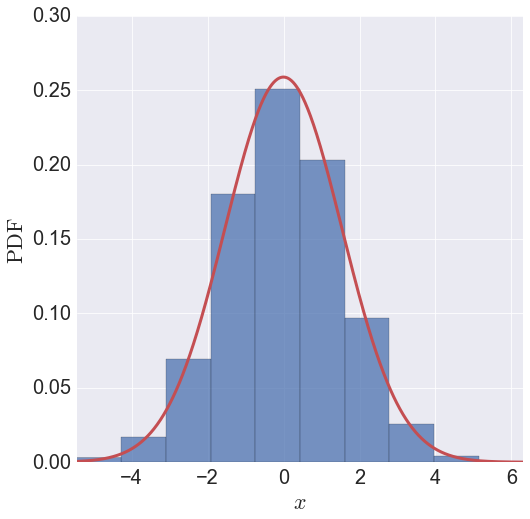

In [74]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.hist(data,alpha=0.75,normed=True)
ax.plot(x,gauss,linewidth=3,color=seaborn.color_palette('deep')[2])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\mathrm{PDF}$')
ax.set_xlim([xmin,xmax])
plt.savefig('../results/sample_sim_plot.pdf',format='pdf',dpi=1000)
plt.show()